Hola **Francisco**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

# Descripción del proyecto

La compañía Sweet Lift Taxi ha recopilado datos históricos sobre pedidos de taxis en los aeropuertos. Para atraer a más conductores durante las horas pico, necesitamos predecir la cantidad de pedidos de taxis para la próxima hora. Construye un modelo para dicha predicción.

La métrica RECM en el conjunto de prueba no debe ser superior a 48.

## Instrucciones del proyecto.

1. Descarga los datos y haz el remuestreo por una hora.
2. Analiza los datos
3. Entrena diferentes modelos con diferentes hiperparámetros. La muestra de prueba debe ser el 10% del conjunto de datos inicial.4. Prueba los datos usando la muestra de prueba y proporciona una conclusión.

## Descripción de los datos

Los datos se almacenan en el archivo `taxi.csv`. 	
El número de pedidos está en la columna `num_orders`.

## Preparación

In [36]:
#Cargado de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose

In [37]:
#Cargado de conjunto en variable y verificacion del conjunto
taxis = pd.read_csv('/datasets/taxi.csv',index_col=[0], parse_dates=[0])

taxis.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


In [38]:
#Verificacion de valores del conjunto 
taxis.describe(include='all')

,num_orders
count,26496.000000
mean,14.070463
std,9.211330
min,0.000000
25%,8.000000
50%,13.000000
75%,19.000000
max,119.000000


In [39]:
#Exploracion del conjunto 
taxis.head(20)

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32
2018-03-01 00:50:00,21
2018-03-01 01:00:00,7
2018-03-01 01:10:00,5
2018-03-01 01:20:00,17


In [40]:
#Verificacion de informacion de conjunto de 1 hora remuestreado
taxis_1H = taxis.resample('1H').sum()

print(taxis_1H)

                     num_orders
datetime                       
2018-03-01 00:00:00         124
2018-03-01 01:00:00          85
2018-03-01 02:00:00          71
2018-03-01 03:00:00          66
2018-03-01 04:00:00          43
...                         ...
2018-08-31 19:00:00         136
2018-08-31 20:00:00         154
2018-08-31 21:00:00         159
2018-08-31 22:00:00         223
2018-08-31 23:00:00         205

[4416 rows x 1 columns]


In [41]:
#Verificacion de informacion de conjunto de 1 hora
taxis_1H.describe()

,num_orders
count,4416.000000
mean,84.422781
std,45.023853
min,0.000000
25%,54.000000
50%,78.000000
75%,107.000000
max,462.000000


In [42]:
#Verificacion de informacion de conjunto de 1 dia remuestreado
taxis_1D = taxis.resample('1D').sum()

print(taxis_1D)

            num_orders
datetime              
2018-03-01        1364
2018-03-02        1506
2018-03-03        1290
2018-03-04        1141
2018-03-05        1259
...                ...
2018-08-27        3936
2018-08-28        3357
2018-08-29        3762
2018-08-30        4090
2018-08-31        4018

[184 rows x 1 columns]


In [43]:
#Verificacion de informacion de conjunto de 1 dia
taxis_1D.describe()

,num_orders
count,184.000000
mean,2026.146739
std,635.874120
min,1076.000000
25%,1547.500000
50%,1911.500000
75%,2349.750000
max,4090.000000


## Análisis

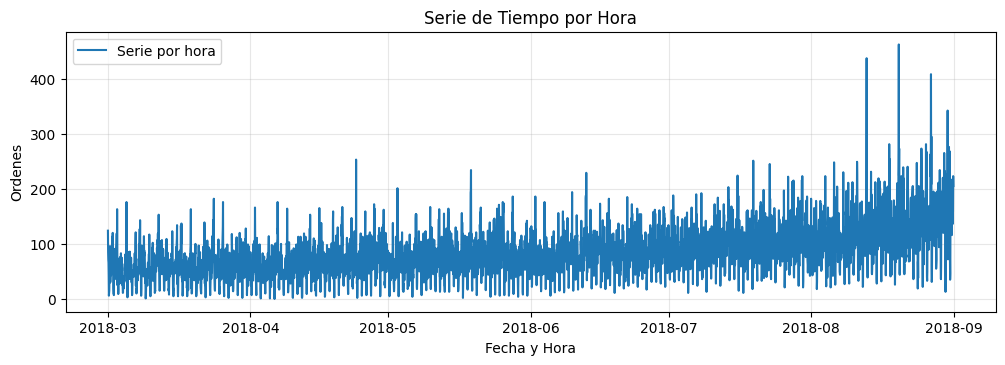

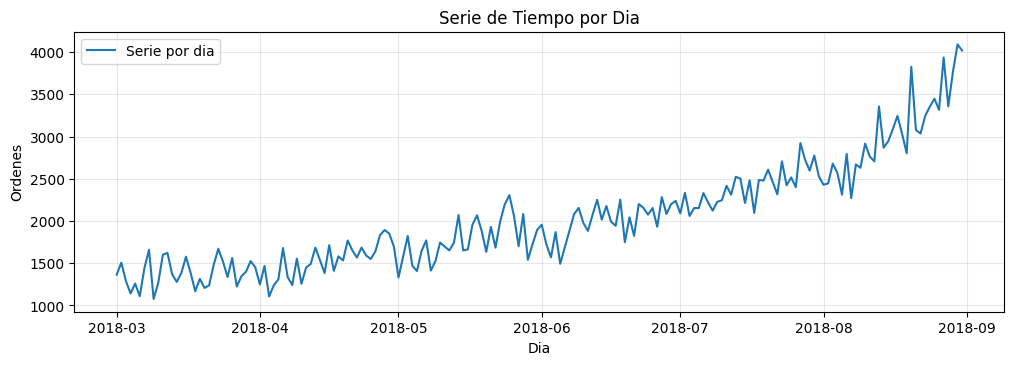

In [44]:
#Verificacion de series de tiempo para 1 hora y 1 dia
taxis_1H.sort_index(inplace=True)
taxis_1D.sort_index(inplace=True)
plt.figure(figsize=(12,8))

plt.subplot(2,1,1)
plt.plot(taxis_1H.index, taxis_1H['num_orders'],label='Serie por hora')
plt.title('Serie de Tiempo por Hora')
plt.xlabel('Fecha y Hora')
plt.ylabel('Ordenes')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

plt.figure(figsize=(12,8))

plt.subplot(2,1,2)
plt.plot(taxis_1D.index, taxis_1D['num_orders'],label='Serie por dia')
plt.title('Serie de Tiempo por Dia')
plt.xlabel('Dia')
plt.ylabel('Ordenes')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

Text(0, 0.5, 'Ordenes')

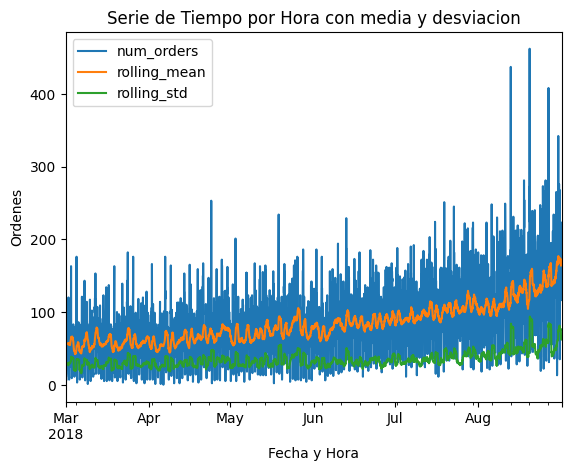

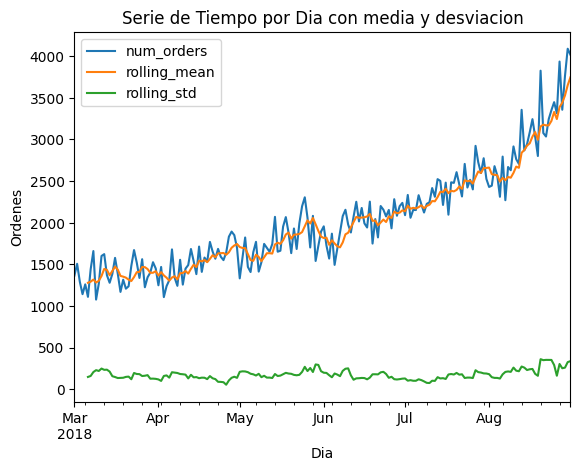

In [45]:
#Comparacion de medianas y desviaciones para conjunto de 1 hora y 1 dia
taxis_1H['rolling_mean'] = taxis_1H['num_orders'].rolling(24).mean()
taxis_1H['rolling_std'] = taxis_1H['num_orders'].rolling(24).std()
taxis_1H.plot()
plt.title('Serie de Tiempo por Hora con media y desviacion')
plt.xlabel('Fecha y Hora')
plt.ylabel('Ordenes')

taxis_1D['rolling_mean'] = taxis_1D['num_orders'].rolling(6).mean()
taxis_1D['rolling_std'] = taxis_1D['num_orders'].rolling(6).std()
taxis_1D.plot()
plt.title('Serie de Tiempo por Dia con media y desviacion')
plt.xlabel('Dia')
plt.ylabel('Ordenes')

<AxesSubplot:title={'center':'Tendencia por dia'}, xlabel='datetime'>

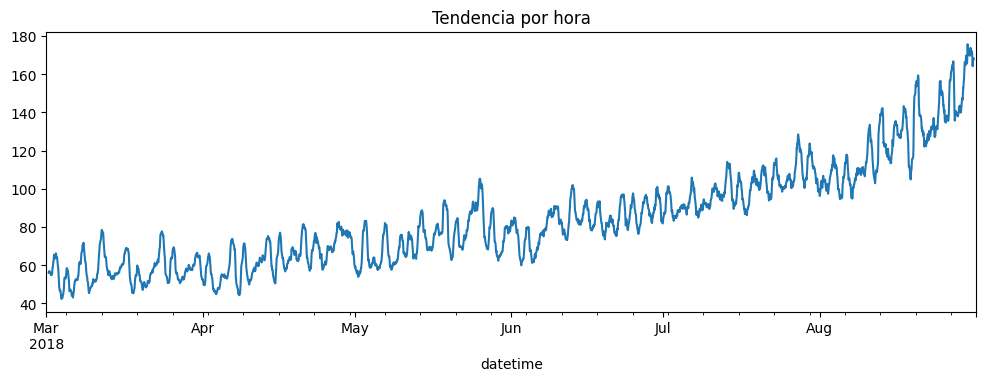

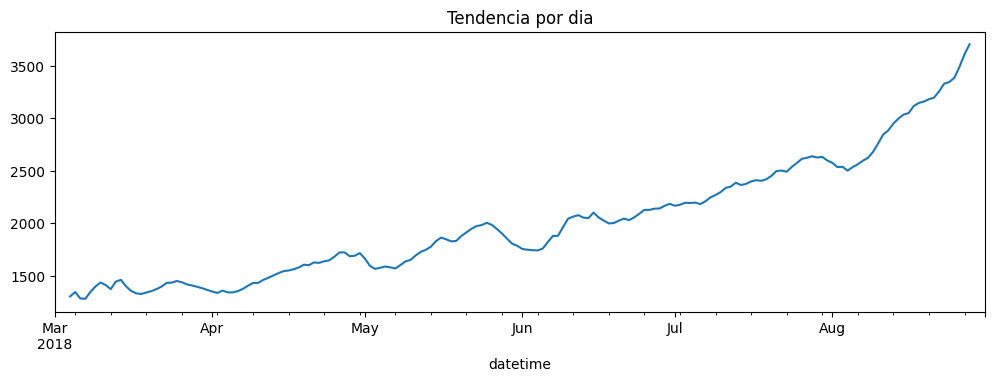

In [46]:
#Comparacion de tendencias para conjunto de 1 hora y 1 dia
decomposed = seasonal_decompose(taxis_1H['num_orders'])
decomposed_d = seasonal_decompose(taxis_1D['num_orders'])

plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
decomposed.trend.plot(title='Tendencia por hora')

plt.figure(figsize=(12,8))
plt.subplot(2,1,2)
decomposed_d.trend.plot(title='Tendencia por dia')

<AxesSubplot:title={'center':'Estacionalidad por dia'}, xlabel='datetime'>

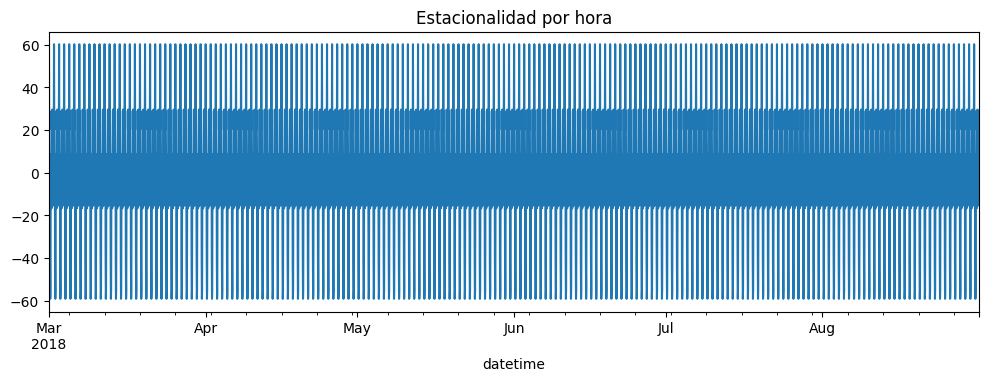

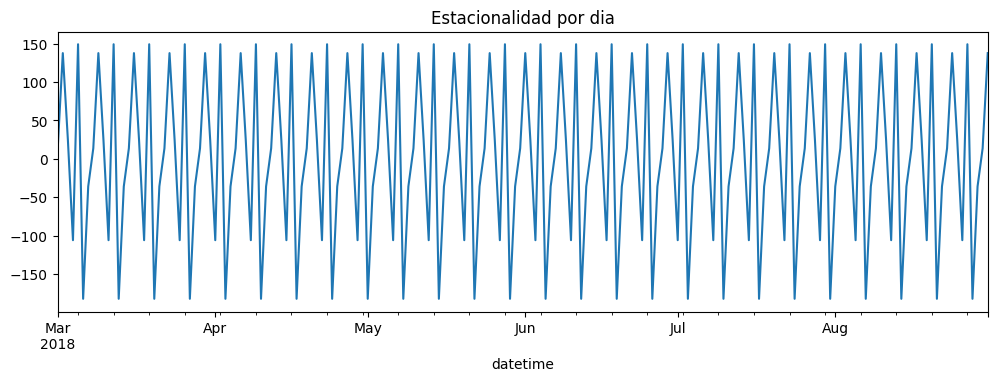

In [47]:
#Comparacion de estacionalidad para conjunto de 1 hora y 1 dia
plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
decomposed.seasonal.plot(title='Estacionalidad por hora')

plt.figure(figsize=(12,8))
plt.subplot(2,1,2)
decomposed_d.seasonal.plot(title='Estacionalidad por dia')


<AxesSubplot:title={'center':'Residuales por dia'}, xlabel='datetime'>

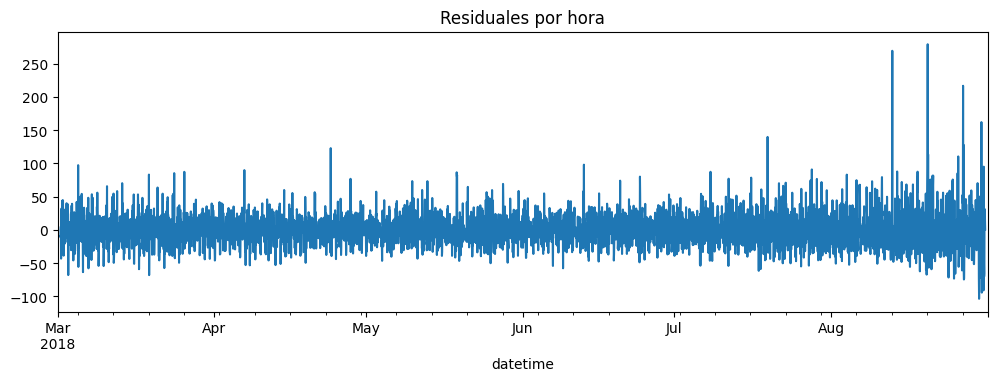

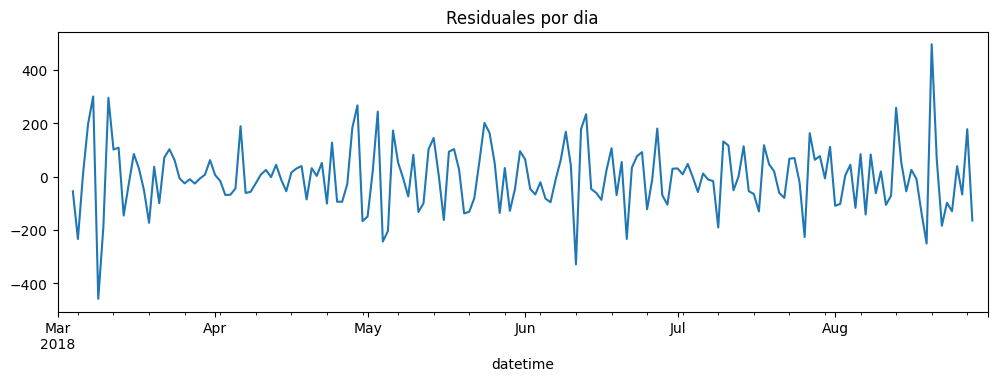

In [48]:
#Comparacion de residuo para conjunto de 1 hora y 1 dia
plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
decomposed.resid.plot(title='Residuales por hora')

plt.figure(figsize=(12,8))
plt.subplot(2,1,2)
decomposed_d.resid.plot(title='Residuales por dia')

Se generaron dos conjuntos: uno de 1 hora y otro de 1 dia de separacion entre las filas. Esto fue con el objetivo de ver claramente tendencias y estacionalidades. 
Al realizar la separacion se ve mas claramente la tendencia en el de 1 dia, lo que no luce tan claro en el de 1 hora. El mismo efecto se nota en el de estacionalidad.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien realizadas las gráficas para analizar los datos considerando el tipo de problema a resolver, que en este caso es serie de tiempo
</div>

## Formación

In [49]:
#Creacion de funcion para obtener el lag y las medias para mejorar RMSE
def lagsize(data,max_lag,rolling_mean_size):
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)

    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()

In [50]:
#Separacion de variables caracteristicas 
taxis_1H['year'] = taxis_1H.index.year
taxis_1H['month'] = taxis_1H.index.month
taxis_1H['day'] = taxis_1H.index.day
taxis_1H['dayofweek'] = taxis_1H.index.dayofweek
taxis_1H['hour'] = taxis_1H.index.hour

taxis_1H.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num_orders    4416 non-null   int64  
 1   rolling_mean  4393 non-null   float64
 2   rolling_std   4393 non-null   float64
 3   year          4416 non-null   int64  
 4   month         4416 non-null   int64  
 5   day           4416 non-null   int64  
 6   dayofweek     4416 non-null   int64  
 7   hour          4416 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 310.5 KB


In [51]:
#Verificacion de conjunto con separacion de datetime
taxis_1H.tail(10)

,num_orders,rolling_mean,rolling_std,year,month,day,dayofweek,hour
datetime,,,,,,,,
2018-08-31 14:00:00,133,172.875000,75.216969,2018,8,31,4,14
2018-08-31 15:00:00,116,171.208333,76.045741,2018,8,31,4,15
2018-08-31 16:00:00,197,168.833333,74.215706,2018,8,31,4,16
2018-08-31 17:00:00,217,163.625000,65.396990,2018,8,31,4,17
2018-08-31 18:00:00,207,164.875000,65.948143,2018,8,31,4,18
2018-08-31 19:00:00,136,167.541667,63.268908,2018,8,31,4,19
2018-08-31 20:00:00,154,168.041667,63.105487,2018,8,31,4,20
2018-08-31 21:00:00,159,166.416667,62.801908,2018,8,31,4,21
2018-08-31 22:00:00,223,169.125000,63.816525,2018,8,31,4,22


In [52]:
#Division de de conjuntos en entrenamiento y prueba
#obtencion de conjuntos de caracteristicas y objetivo
lagsize(taxis_1H,6,10)

train, test = train_test_split(taxis_1H,shuffle=False,test_size=.1)
train = train.dropna()
test = test.dropna()

features_train = train.drop('num_orders',axis=1)
target_train = train['num_orders']
features_test = test.drop('num_orders',axis=1)
target_test = test['num_orders']

print(f'Dimensiones dataset de caracteristicas de entrenamiento:',features_train.shape)
print(f'Dimensiones dataset de objetivo de entrenamiento:',target_train.shape)
print(f'Dimensiones dataset de caracteristicas de prueba:',features_test.shape)
print(f'Dimensiones dataset de objetivo de prueba:',target_test.shape)

Dimensiones dataset de caracteristicas de entrenamiento: (3951, 13)
Dimensiones dataset de objetivo de entrenamiento: (3951,)
Dimensiones dataset de caracteristicas de prueba: (442, 13)
Dimensiones dataset de objetivo de prueba: (442,)


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Correcto, realizaste los ajustes de las características en el dataset de manera adecuada para obtener un buen desempeño en los entrenamientos
    
</div>

**Regresion lineal**

In [53]:
#Entrenamiento de regresion linear con cojunto de entrenamiento
lr = LinearRegression()
lr.fit(features_train,target_train)
pred_train = lr.predict(features_train)

**Arbol de decision**

In [54]:
#Obtencion de mejores hiperparametros para arbol de decision con cojunto de entrenamiento
dt_params = {
    'max_depth': [5,10,40,50,100,200,None],
    'min_samples_split': [5,10,20,30,50],
    'min_samples_leaf': [1,2,5,10,20,50,100],
    'max_features': ['sqrt','log2',None]
}

dt = DecisionTreeRegressor(random_state=12345)
dt_grid = GridSearchCV(dt,dt_params,cv=3,n_jobs=-1,verbose=1,scoring='neg_mean_squared_error')

dt_grid.fit(features_train,target_train)

print(f"Mejores parámetros Decision Tree: {dt_grid.best_params_}")

Fitting 3 folds for each of 735 candidates, totalling 2205 fits
Mejores parámetros Decision Tree: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 5}


**Bosque aleatorio**

In [55]:
#Obtencion de mejores hiperparametros para bosque aleatorio con conjunto de entrenamiento
rf_params = {
    'n_estimators': [3,5,10,50,100,200],
    'max_depth': [None,3,5,10,50,100],
    'min_samples_split': [2,10,50,100],
    'min_samples_leaf': [1,5,10,20,30],
    'max_features': ['sqrt','log2',None]
}

rf = RandomForestRegressor(random_state=12345)
rf_grid = GridSearchCV(rf,rf_params,cv=3,n_jobs=-1,verbose=1,scoring='neg_mean_squared_error')

rf_grid.fit(features_train,target_train)

print(f"Mejores parámetros Random Forest: {rf_grid.best_params_}")

Fitting 3 folds for each of 2160 candidates, totalling 6480 fits
Mejores parámetros Random Forest: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 200}


## Prueba

**Regresion Linear**

In [56]:
#Obtencion de RMSE para regresion linear con conjunto de prueba
pred_lr_test = lr.predict(features_test)

lr_rmse = np.sqrt(mean_squared_error(pred_lr_test,target_test))
print(f'RMSE para Linear Regression con test:',lr_rmse)

RMSE para Linear Regression con test: 50.75321223916002


**Arbol de decision**

In [57]:
#Obtencion de RMSE para arbol de decision con conjunto de prueba
best_dt = dt_grid.best_estimator_
pred_dt_test = best_dt.predict(features_test)

dt_rmse = np.sqrt(mean_squared_error(pred_dt_test,target_test))
print(f'RMSE para Decision Tree Regressor con test:',dt_rmse)

RMSE para Decision Tree Regressor con test: 45.02467457554522


**Bosque aleatorio**

In [58]:
#Obtencion de RMSE para bosque aleatorio con conjunto de prueba
best_rf = rf_grid.best_estimator_
pred_rf_test = best_rf.predict(features_test)

rf_rmse = np.sqrt(mean_squared_error(pred_rf_test,target_test))
print(f'RMSE para Random Forest con test:',rf_rmse)

RMSE para Random Forest con test: 43.706975150612486


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien! Lograste una métrica por debajo de lo requerido para este proyecto demostrando que el modelo pudo interpretar de manera adecuada tus datos para la predicción
</div>

## Conclusiones

In [59]:
#Generacion de tabla de resultados de RMSE de todos los modelos evaluados con test
resultados = {
    'Modelo': ['Regresión Lineal', 'Árbol de Decisión', 'Random Forest'],
    'RMSE_Test': [lr_rmse, dt_rmse, rf_rmse],
    'Cumple_Objetivo': [
        'Sí' if lr_rmse < 48 else 'No',
        'Sí' if dt_rmse < 48 else 'No', 
        'Sí' if rf_rmse < 48 else 'No'
    ]
}

df_resultados = pd.DataFrame(resultados)
print("\n Resumen de RMSE:")
print(df_resultados.to_string(index=False))


 Resumen de RMSE:
           Modelo  RMSE_Test Cumple_Objetivo
 Regresión Lineal  50.753212              No
Árbol de Decisión  45.024675              Sí
    Random Forest  43.706975              Sí


En la tabla anterior podemos observar que de los 3 modelos evaluados con el conjunto de prueba (10%), solo 2 cumplen con el objetivo de estar por debajo de 48 de RMSE. Los modelos de arbol de decision y bosque aleatorio son los que cumplen con el requisito del proyecto, si se tuviera que elegir entre alguno de los dos se elegiria el de bosque aleatorio que es el que esta mas por debajo de 48.

<div class="alert alert-block alert-success">
<b>Comentario general (1ra Iteracion)</b> <a class=“tocSkip”></a>

Te felicito por el trabajo realizado Francisco, aplicaste los procesos adecuados al dataset para darle características nuevas al modelo, con ese proceso aportas significativamente al desempeño del mismo y obtuviste una métrica que supera lo propuesto para este proyecto, continúa con este gran trabajo!
    
   
Este proyecto es uno donde se ve claramente la importancia de darle características o variables adecuadas a los modelos para obtener un correcto desempeño, si quitas o pones más variables el desempeño del modelo variará para bien o para mal según la calidad de las mismas. Saludos!
</div>

# Lista de revisión

- [x]  	
Jupyter Notebook está abierto.
- [x]  El código no tiene errores
- [x]  Las celdas con el código han sido colocadas en el orden de ejecución.
- [x]  	
Los datos han sido descargados y preparados.
- [x]  Se ha realizado el paso 2: los datos han sido analizados
- [x]  Se entrenó el modelo y se seleccionaron los hiperparámetros
- [x]  Se han evaluado los modelos. Se expuso una conclusión
- [x] La *RECM* para el conjunto de prueba no es más de 48